# PREDIKSI DAN ANALISIS PENGARUH INFLASI TERHADAP RATA-RATA HARGA BERAS TINGKAT PENGGILINGAN DI INDONESIA

Nama Anggota Kelompok :

1. Gerrard Sebastian - NIM 1203220018
2. Ali Rafli Putra Hakiki - NIM 1203220107
3. Okky Rangga Pratama - NIM 1203220011

## IMPORT LIBRARY

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
        'modsim.py')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modsim import *

## DATA HARGA BERAS DI INDONESIA

In [3]:
# Baca file harga_beras.csv
data_beras = pd.read_csv("harga_beras.csv")
data_beras.rename(columns={"KUALITAS BERAS": "Kualitas beras", "RATA-RATA HARGA (Rp/Kg)": "Rata-rata harga (Rp/Kg)", "BULAN": "Bulan", "TAHUN": "Tahun"}, inplace=True)

In [4]:
# Cek 24 baris pertama untuk memahami struktur data
print(data_beras.head(24))

   Kualitas beras  Rata-rata harga (Rp/Kg)      Bulan  Tahun
0         Premium                  8208.79    Januari   2014
1         Premium                  8303.23   Februari   2014
2         Premium                  8192.87      Maret   2014
3         Premium                  7919.93      April   2014
4         Premium                  8009.43        Mei   2014
5         Premium                  8167.57       Juni   2014
6         Premium                  8228.30       Juli   2014
7         Premium                  8329.47    Agustus   2014
8         Premium                  8310.51  September   2014
9         Premium                  8396.86    Oktober   2014
10        Premium                  8555.14   November   2014
11        Premium                  9018.39   Desember   2014
12         Medium                  8028.48    Januari   2014
13         Medium                  8129.02   Februari   2014
14         Medium                  8083.86      Maret   2014
15         Medium       

In [5]:
# Cek informasi dataset untuk mengetahui ada tidaknya missing values
print(data_beras.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Kualitas beras           216 non-null    object 
 1   Rata-rata harga (Rp/Kg)  216 non-null    float64
 2   Bulan                    216 non-null    object 
 3   Tahun                    216 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ KB
None


In [6]:
# Mengelompokkan data berdasarkan kualitas beras dan tahun, dan menghitung rata-rata harga per kilogram
rata_rata_per_tahun = data_beras.groupby(['Kualitas beras', 'Tahun'])['Rata-rata harga (Rp/Kg)'].mean().reset_index()

# Mengurutkan data berdasarkan kualitas beras (Premium terlebih dahulu) dan tahun
rata_rata_per_tahun = rata_rata_per_tahun.sort_values(by=['Kualitas beras', 'Tahun'])

# Memformat rata-rata harga menjadi dua angka di belakang koma
rata_rata_per_tahun['Rata-rata harga (Rp/Kg)'] = rata_rata_per_tahun['Rata-rata harga (Rp/Kg)'].round(2)

# Menampilkan hasil
print(rata_rata_per_tahun)

   Kualitas beras  Tahun  Rata-rata harga (Rp/Kg)
0          Medium   2014                  8103.39
1          Medium   2015                  9106.63
2          Medium   2016                  9059.34
3          Medium   2017                  8959.58
4          Medium   2018                  9509.54
5          Medium   2019                  9414.03
6          Medium   2020                  9533.78
7          Medium   2021                  9059.67
8          Medium   2022                  9501.05
9         Premium   2014                  8303.37
10        Premium   2015                  9360.65
11        Premium   2016                  9335.98
12        Premium   2017                  9468.85
13        Premium   2018                  9744.62
14        Premium   2019                  9688.26
15        Premium   2020                  9920.03
16        Premium   2021                  9574.26
17        Premium   2022                  9972.88


In [7]:
# Membuat salinan data rata_rata_per_tahun untuk mencegah perubahan pada data asli
data_pertumbuhan = rata_rata_per_tahun.copy()

# Menambahkan kolom "Tingkat pertumbuhan"
data_pertumbuhan['Tingkat pertumbuhan (%)'] = 0.0

# Menghitung tingkat pertumbuhan untuk setiap baris dari tahun kedua ke atas
for i in range(1, len(data_pertumbuhan)):
    # Menghitung perbedaan persentase antara harga tahun sekarang dan tahun sebelumnya
    growth_rate = ((data_pertumbuhan.loc[i, 'Rata-rata harga (Rp/Kg)'] - 
                    data_pertumbuhan.loc[i - 1, 'Rata-rata harga (Rp/Kg)']) /
                   data_pertumbuhan.loc[i - 1, 'Rata-rata harga (Rp/Kg)']) * 100
    # Menetapkan nilai tingkat pertumbuhan pada baris saat ini
    data_pertumbuhan.loc[i, 'Tingkat pertumbuhan (%)'] = growth_rate

# Menampilkan hasil hanya untuk tahun 2015 ke atas
data_pertumbuhan = data_pertumbuhan[data_pertumbuhan['Tahun'] >= 2015]

# Menampilkan hasil dengan kolom yang diminta
print(data_pertumbuhan[['Kualitas beras', 'Tahun', 'Rata-rata harga (Rp/Kg)', 'Tingkat pertumbuhan (%)']])

   Kualitas beras  Tahun  Rata-rata harga (Rp/Kg)  Tingkat pertumbuhan (%)
1          Medium   2015                  9106.63                12.380498
2          Medium   2016                  9059.34                -0.519292
3          Medium   2017                  8959.58                -1.101184
4          Medium   2018                  9509.54                 6.138234
5          Medium   2019                  9414.03                -1.004360
6          Medium   2020                  9533.78                 1.272038
7          Medium   2021                  9059.67                -4.972949
8          Medium   2022                  9501.05                 4.871921
10        Premium   2015                  9360.65                12.733143
11        Premium   2016                  9335.98                -0.263550
12        Premium   2017                  9468.85                 1.423204
13        Premium   2018                  9744.62                 2.912392
14        Premium   2019 

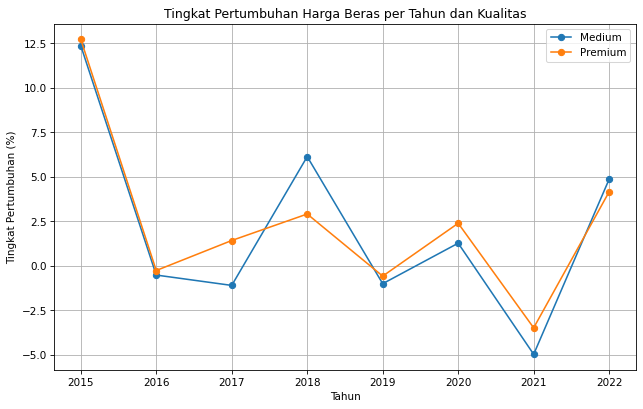

In [8]:
# Menyimpan data dalam time series
timeseries_data = data_pertumbuhan.pivot(index='Tahun', columns='Kualitas beras', values='Tingkat pertumbuhan (%)')

# Membuat plot untuk tingkat pertumbuhan tiap tahunnya untuk setiap kualitas beras
plt.figure(figsize=(10, 6))
for quality in timeseries_data.columns:
    plt.plot(timeseries_data.index, timeseries_data[quality], marker='o', label=quality)

plt.title('Tingkat Pertumbuhan Harga Beras per Tahun dan Kualitas')
plt.xlabel('Tahun')
plt.ylabel('Tingkat Pertumbuhan (%)')
plt.legend()
plt.grid(True)
plt.show()

## DATA INFLASI DI INDONESIA

In [9]:
# Baca file data_inflasi.cv
data_inflasi = pd.read_csv("data_inflasi.csv")
data_inflasi.drop(columns="GDP", inplace=True)
data_inflasi.rename(columns={"TAHUN": "Tahun", "INFLASI": "Inflasi"}, inplace=True)

In [10]:
# Cek lima baris pertama untuk memahami struktur data
print(data_inflasi.head(8))

   Tahun   Inflasi
0   2015  6.363121
1   2016  3.525805
2   2017  3.808798
3   2018  3.198346
4   2019  3.030587
5   2020  1.920968
6   2021  1.560130
7   2022  4.209464


In [11]:
# Cek informasi dataset untuk mengetahui ada tidaknya missing values
print(data_inflasi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tahun    8 non-null      int64  
 1   Inflasi  8 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 256.0 bytes
None


In [12]:
data_inflasi['Inflasi'] = data_inflasi['Inflasi'] / 100.0
print(data_inflasi.head())

   Tahun   Inflasi
0   2015  0.063631
1   2016  0.035258
2   2017  0.038088
3   2018  0.031983
4   2019  0.030306


## MENGGABUNGKAN DATA

In [13]:
# Gabungkan DataFrame data_pertumbuhan dengan data_inflasi berdasarkan kolom "Tahun"
data_combined = pd.merge(data_pertumbuhan, data_inflasi, on='Tahun')

# Tentukan urutan kualitas beras secara kustom
urutan_kualitas = ['Medium', 'Premium']

# Urutkan DataFrame berdasarkan kolom "Kualitas beras" dan kemudian "Tahun"
data_combined = data_combined.sort_values(by=['Kualitas beras', 'Tahun'])

# Tampilkan gabungan data dengan kolom yang diminta
print(data_combined[['Kualitas beras', 'Tahun', 'Rata-rata harga (Rp/Kg)', 'Tingkat pertumbuhan (%)', 'Inflasi']])

   Kualitas beras  Tahun  Rata-rata harga (Rp/Kg)  Tingkat pertumbuhan (%)  \
0          Medium   2015                  9106.63                12.380498   
1          Medium   2016                  9059.34                -0.519292   
2          Medium   2017                  8959.58                -1.101184   
3          Medium   2018                  9509.54                 6.138234   
4          Medium   2019                  9414.03                -1.004360   
5          Medium   2020                  9533.78                 1.272038   
6          Medium   2021                  9059.67                -4.972949   
7          Medium   2022                  9501.05                 4.871921   
8         Premium   2015                  9360.65                12.733143   
9         Premium   2016                  9335.98                -0.263550   
10        Premium   2017                  9468.85                 1.423204   
11        Premium   2018                  9744.62               

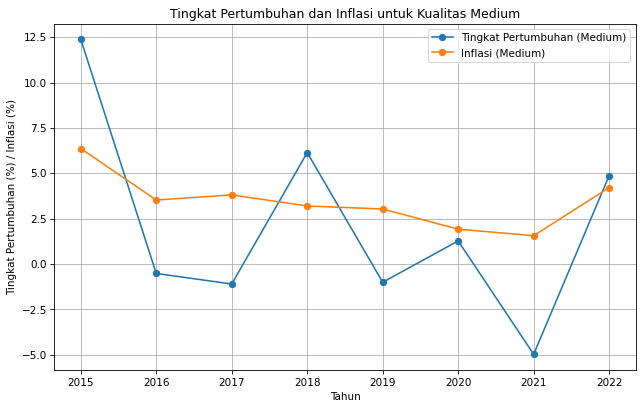

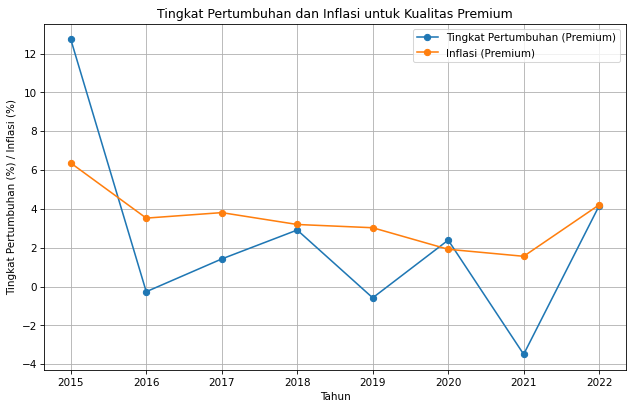

In [14]:
# Pisahkan data untuk setiap kualitas beras
data_medium = data_combined[data_combined['Kualitas beras'] == 'Medium']
data_premium = data_combined[data_combined['Kualitas beras'] == 'Premium']

# Plot tingkat pertumbuhan dan inflasi untuk kualitas Medium
plt.figure(figsize=(10, 6))
plt.plot(data_medium['Tahun'], data_medium['Tingkat pertumbuhan (%)'], marker='o', label='Tingkat Pertumbuhan (Medium)')
plt.plot(data_medium['Tahun'], data_medium['Inflasi'] * 100, marker='o', label='Inflasi (Medium)')
plt.title('Tingkat Pertumbuhan dan Inflasi untuk Kualitas Medium')
plt.xlabel('Tahun')
plt.ylabel('Tingkat Pertumbuhan (%) / Inflasi (%)')
plt.legend()
plt.grid(True)
plt.show()

# Plot tingkat pertumbuhan dan inflasi untuk kualitas Premium
plt.figure(figsize=(10, 6))
plt.plot(data_premium['Tahun'], data_premium['Tingkat pertumbuhan (%)'], marker='o', label='Tingkat Pertumbuhan (Premium)')
plt.plot(data_premium['Tahun'], data_premium['Inflasi'] * 100, marker='o', label='Inflasi (Premium)')
plt.title('Tingkat Pertumbuhan dan Inflasi untuk Kualitas Premium')
plt.xlabel('Tahun')
plt.ylabel('Tingkat Pertumbuhan (%) / Inflasi (%)')
plt.legend()
plt.grid(True)
plt.show()

## SIMULASI PROGRAM (TIMESERIES)

### PREDIKSI HARGA BERAS MEDIUM TAHUN 2023 SAMPAI 2030

In [15]:
# Mendefinisikan fungsi untuk membuat state dan system
def make_state_and_system(data, kualitas_beras):
    data_kualitas = data[data['Kualitas beras'] == kualitas_beras]
    tahun_terakhir = data_kualitas["Tahun"].max()
    data_terakhir = data_kualitas[data_kualitas["Tahun"] == tahun_terakhir].iloc[0]

    # Membuat objek State
    state = State(
        kualitas_beras = kualitas_beras,
        tahun_awal_prediksi = tahun_terakhir + 1,
        tahun_akhir_prediksi = tahun_terakhir + 10  # Misalnya kita ingin memprediksi 10 tahun ke depan
    )

    # Membuat objek System
    system = System(
        rata_rata_harga_terkini = data_terakhir["Rata-rata harga (Rp/Kg)"],
        inflasi_terkini = data_terakhir["Inflasi"],
        tingkat_pertumbuhan_terkini = data_terakhir["Tingkat pertumbuhan (%)"]
    )

    return state, system

# Contoh penggunaan
state, system = make_state_and_system(data_combined, 'Medium')

print("State:")
print(state)
print("\nSystem:")
print(system)

State:
kualitas_beras          Medium
tahun_awal_prediksi       2023
tahun_akhir_prediksi      2032
Name: state, dtype: object

System:
System(rata_rata_harga_terkini=9501.05, inflasi_terkini=0.042094638340000004, tingkat_pertumbuhan_terkini=4.871921383449941)


Time
2023     9968.13
2024    10458.17
2025    10972.30
2026    11511.70
2027    12077.63
2028    12671.37
2029    13294.30
2030    13947.86
2031    14633.55
2032    15352.94
Name: Quantity, dtype: float64


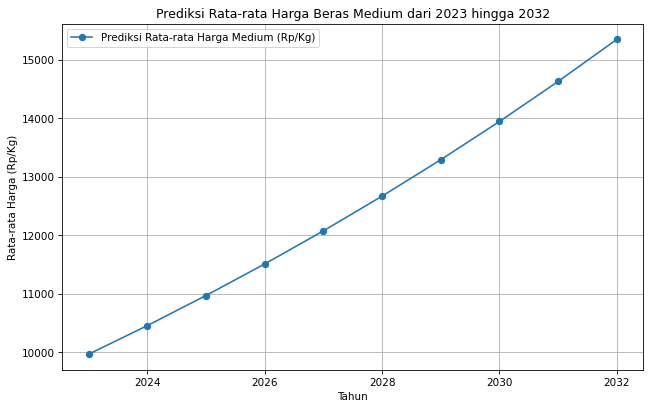

In [16]:
# Modifikasi fungsi update_func
def update_func(state, system):
    """Update rata-rata harga berdasarkan inflasi dan tingkat pertumbuhan."""
    system.rata_rata_harga_terkini *= (1 + system.inflasi_terkini / 100) * (1 + system.tingkat_pertumbuhan_terkini / 100)
    return system.rata_rata_harga_terkini

# Modifikasi fungsi run_simulation untuk Medium
def run_simulation_medium(state, system):
    """Simulasi prediksi rata-rata harga beras Medium dalam Rp/Kg."""
    results = TimeSeries()
    for tahun in range(state.tahun_awal_prediksi, state.tahun_akhir_prediksi + 1):
        prediksi_harga = update_func(state, system)
        results[tahun] = prediksi_harga
    return results

# Contoh penggunaan untuk Medium
state_medium, system_medium = make_state_and_system(data_combined, kualitas_beras='Medium')
results_medium = run_simulation_medium(state_medium, system_medium)
print(results_medium.round(2))

# Visualisasi untuk Medium
plt.figure(figsize=(10, 6))
plt.plot(results_medium, marker='o', label='Prediksi Rata-rata Harga Medium (Rp/Kg)')
plt.title('Prediksi Rata-rata Harga Beras Medium dari {} hingga {}'.format(state_medium.tahun_awal_prediksi, state_medium.tahun_akhir_prediksi))
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga (Rp/Kg)')
plt.legend()
plt.grid(True)
plt.show()

### PREDIKSI HARGA BERAS PREMIUM TAHUN 2023 SAMPAI 2030

In [17]:
# Mendefinisikan fungsi untuk membuat state dan system
def make_state_and_system(data, kualitas_beras):
    data_kualitas = data[data['Kualitas beras'] == kualitas_beras]
    tahun_terakhir = data_kualitas["Tahun"].max()
    data_terakhir = data_kualitas[data_kualitas["Tahun"] == tahun_terakhir].iloc[0]

    # Membuat objek State
    state = State(
        kualitas_beras = kualitas_beras,
        tahun_awal_prediksi = tahun_terakhir + 1,
        tahun_akhir_prediksi = tahun_terakhir + 10  # Misalnya kita ingin memprediksi 10 tahun ke depan
    )

    # Membuat objek System
    system = System(
        rata_rata_harga_terkini = data_terakhir["Rata-rata harga (Rp/Kg)"],
        inflasi_terkini = data_terakhir["Inflasi"],
        tingkat_pertumbuhan_terkini = data_terakhir["Tingkat pertumbuhan (%)"]
    )

    return state, system

# Contoh penggunaan
state, system = make_state_and_system(data_combined, kualitas_beras='Premium')

print("State:")
print(state)
print("\nSystem:")
print(system)

State:
kualitas_beras          Premium
tahun_awal_prediksi        2023
tahun_akhir_prediksi       2032
Name: state, dtype: object

System:
System(rata_rata_harga_terkini=9972.88, inflasi_terkini=0.042094638340000004, tingkat_pertumbuhan_terkini=4.16345493019825)


Time
2023    10392.47
2024    10829.71
2025    11285.35
2026    11760.16
2027    12254.94
2028    12770.55
2029    13307.84
2030    13867.74
2031    14451.20
2032    15059.21
Name: Quantity, dtype: float64


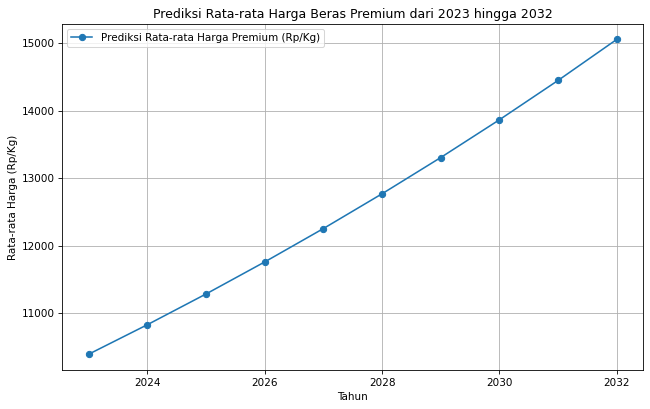

In [18]:
# Modifikasi fungsi update_func
def update_func(state, system):
    """Update rata-rata harga berdasarkan inflasi dan tingkat pertumbuhan."""
    system.rata_rata_harga_terkini *= (1 + system.inflasi_terkini / 100) * (1 + system.tingkat_pertumbuhan_terkini / 100)
    return system.rata_rata_harga_terkini

# Modifikasi fungsi run_simulation untuk Premium
def run_simulation_premium(state, system):
    """Simulasi prediksi rata-rata harga beras Premium dalam Rp/Kg."""
    results = TimeSeries()
    for tahun in range(state.tahun_awal_prediksi, state.tahun_akhir_prediksi + 1):
        prediksi_harga = update_func(state, system)
        results[tahun] = prediksi_harga
    return results

# Contoh penggunaan untuk Premium
state_premium, system_premium = make_state_and_system(data_combined, kualitas_beras="Premium")
results_premium = run_simulation_premium(state_premium, system_premium)
print(results_premium.round(2))

# Visualisasi untuk Premium
plt.figure(figsize=(10, 6))
plt.plot(results_premium, marker='o', label='Prediksi Rata-rata Harga Premium (Rp/Kg)')
plt.title('Prediksi Rata-rata Harga Beras Premium dari {} hingga {}'.format(state_premium.tahun_awal_prediksi, state_premium.tahun_akhir_prediksi))
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga (Rp/Kg)')
plt.legend()
plt.grid(True)
plt.show()

## SIMULASI MENGGUNAKAN SWEEPSERIES

### PREDIKSI PENGARUH TINGKAT PERTUMBUHAN TERHADAP RATA RATA HARGA BERAS PREMIUM

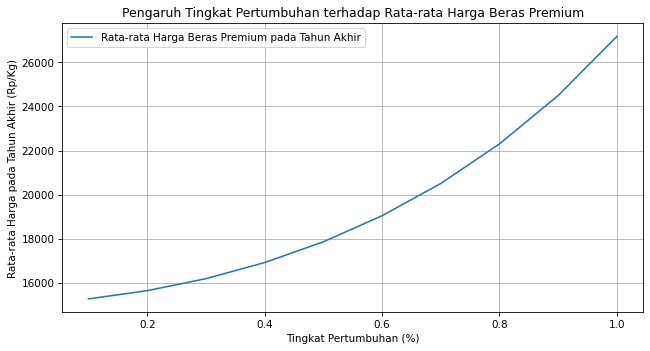

In [19]:
def sweep_growth_rates(state, system, growth_rate_array):
    sweep_results = SweepSeries()
    for growth_rate in growth_rate_array:
        system.tingkat_pertumbuhan_terkini = growth_rate
        results = run_simulation_premium(state, system)
        sweep_results[growth_rate] = results[state.tahun_akhir_prediksi]
    return sweep_results

# Contoh penggunaan
# state_medium, system_medium = make_state_and_system(data_combined, kualitas_beras='Premium')
growth_rate_array = np.linspace(0.1, 1.0, 10)  # Misalnya, variasi tingkat pertumbuhan dari 0% hingga 10%
sweep_results = sweep_growth_rates(state_premium, system_premium, growth_rate_array)

plt.figure(figsize=(10, 5))
plt.plot(sweep_results, label='Rata-rata Harga Beras Premium pada Tahun Akhir')
plt.title('Pengaruh Tingkat Pertumbuhan terhadap Rata-rata Harga Beras Premium')
plt.xlabel('Tingkat Pertumbuhan (%)')
plt.ylabel('Rata-rata Harga pada Tahun Akhir (Rp/Kg)')
plt.legend()
plt.grid(True)
plt.show()

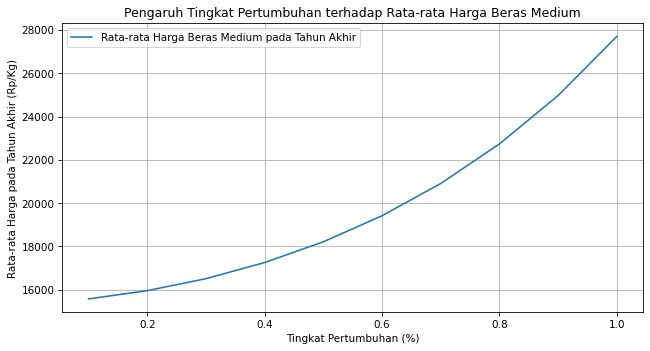

In [20]:
# Fungsi sweep_growth_rates untuk beras medium
def sweep_growth_rates(state, system, growth_rate_array):
    sweep_results = SweepSeries()
    for growth_rate in growth_rate_array:
        system.tingkat_pertumbuhan_terkini = growth_rate
        results = run_simulation_medium(state, system)
        sweep_results[growth_rate] = results[state.tahun_akhir_prediksi]
    return sweep_results

# Contoh penggunaan
# state_medium, system_medium = make_state_and_system(data_combined, kualitas_beras='Medium')
growth_rate_array = np.linspace(0.1, 1.0, 10)  # Misalnya, variasi tingkat pertumbuhan dari 0% hingga 10%
sweep_results = sweep_growth_rates(state_medium, system_medium, growth_rate_array)

plt.figure(figsize=(10, 5))
plt.plot(sweep_results, label='Rata-rata Harga Beras Medium pada Tahun Akhir')
plt.title('Pengaruh Tingkat Pertumbuhan terhadap Rata-rata Harga Beras Medium')
plt.xlabel('Tingkat Pertumbuhan (%)')
plt.ylabel('Rata-rata Harga pada Tahun Akhir (Rp/Kg)')
plt.legend()
plt.grid(True)
plt.show()